In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import  networkx.algorithms.community
from networkx.algorithms import bipartite
from networkx.algorithms import community
from networkx import degree_assortativity_coefficient
import powerlaw
from cdlib import viz

# Import weighted bipartite network

In [2]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_node(l[0], bipartite = 0)
            g.add_node(l[1], bipartite = 1)
            g.add_edge(l[0], l[1], weight=int(l[2]))
            
    return g

g = read_net_w(f'weighted_net.csv')

In [3]:
top_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(g) - top_nodes #to obtain 2 set of nodes. 
                                  #This is usefull because a lot of bipartite functions need a set of nodes
print(len(top_nodes))
print(len(bottom_nodes))

11110
156


## Community Discovery on bipartite graph

https://cdlib.readthedocs.io/en/latest/reference/evaluation.html link to the evaluation meaning

In [4]:
import  networkx.algorithms.community
import  networkx.algorithms.community
from networkx.algorithms import community
from networkx.algorithms.community import k_clique_communities
from cdlib import algorithms
from cdlib import evaluation
from cdlib.algorithms import louvain

C:\Users\monia\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
communities = louvain(g)
mod = communities.adjusted_mutual_information(communities)
print(mod)

MatchingResult(score=1.0, std=None)


In [6]:
communities.average_internal_degree(summary=True)

FitnessResult(min=1.7142857142857142, max=1.997032640949555, score=1.974864883757452, std=0.037206521961802054)

In [7]:
l=communities.communities

In [8]:
for i in range (0,67):
    c=g.subgraph(l[i])
    print("Assortativity cluster {} : {} ".format(i, degree_assortativity_coefficient(c, x='out', y='in', weight=None, nodes=None) ))

Assortativity cluster 0 : -1.0 
Assortativity cluster 1 : -1.0 
Assortativity cluster 2 : -1.0 
Assortativity cluster 3 : -1.0 
Assortativity cluster 4 : -1.0 
Assortativity cluster 5 : -0.8042257440112195 
Assortativity cluster 6 : -1.0 
Assortativity cluster 7 : -1.0 
Assortativity cluster 8 : -1.0 
Assortativity cluster 9 : -1.0 
Assortativity cluster 10 : -1.0 
Assortativity cluster 11 : -0.8960291988350951 
Assortativity cluster 12 : -1.0 
Assortativity cluster 13 : -0.7689155121492518 
Assortativity cluster 14 : -1.0 
Assortativity cluster 15 : -1.0 
Assortativity cluster 16 : -1.0 
Assortativity cluster 17 : -0.5711730737565522 
Assortativity cluster 18 : -0.8799577085515862 
Assortativity cluster 19 : -1.0 
Assortativity cluster 20 : -0.8054399091272406 
Assortativity cluster 21 : -0.8425050990932076 
Assortativity cluster 22 : -1.0 
Assortativity cluster 23 : -1.0 
Assortativity cluster 24 : -0.6222300433676832 
Assortativity cluster 25 : -0.7517402626808946 
Assortativity clu

In [9]:
l=communities.communities
b=[]
for i in range (0,67):
    c=g.subgraph(l[i])
    degrees = dict(c.degree())
    ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
    b.append(ranks)
b

[[('654931', 673),
  ('13716055', 1),
  ('3027421', 1),
  ('17710331', 1),
  ('14904448', 1),
  ('45493639', 1),
  ('66848877', 1),
  ('87629872', 1),
  ('10211437', 1),
  ('48605364', 1),
  ('23024808', 1),
  ('998729', 1),
  ('170921237', 1),
  ('8599754', 1),
  ('9673313', 1),
  ('102093096', 1),
  ('245727573', 1),
  ('6632937', 1),
  ('77332175', 1),
  ('4300248', 1),
  ('14986926', 1),
  ('26395275', 1),
  ('11244254', 1),
  ('3453983', 1),
  ('80516910', 1),
  ('22894397', 1),
  ('11285537', 1),
  ('177157565', 1),
  ('2135694', 1),
  ('57667444', 1),
  ('4321823', 1),
  ('32043577', 1),
  ('8918464', 1),
  ('1531348', 1),
  ('31436241', 1),
  ('116683863', 1),
  ('4942717', 1),
  ('170946525', 1),
  ('153262067', 1),
  ('53904494', 1),
  ('6945134', 1),
  ('13693014', 1),
  ('244809823', 1),
  ('247612975', 1),
  ('232574373', 1),
  ('7262061', 1),
  ('6161371', 1),
  ('192165930', 1),
  ('72834464', 1),
  ('5998465', 1),
  ('184195164', 1),
  ('295996358', 1),
  ('29678209', 1

In [10]:
#nodi con maggiore degree centrality
for i in range(len(b)):
    c=len(b[i])
    for j in range(c):
        for k in range(1,c):
            if b[i][j][1]>b[i][k][1]:
                a=b[i][j]
    print(a)
    

('654931', 673)
('2497346', 581)
('730916', 352)
('2761156', 337)
('15780515', 329)
('24554860', 3)
('2429334', 310)
('685990', 295)
('8269677', 280)
('2763386', 275)
('24628192', 275)
('21366729', 2)
('7812608', 265)
('25992447', 4)
('12801514', 257)
('4656557', 253)
('761411', 246)
('27523926', 4)
('12574897', 9)
('14412610', 230)
('17005568', 6)
('31881097', 2)
('16081933', 208)
('14313251', 193)
('9450450', 6)
('23493592', 4)
('31148061', 3)
('19796378', 4)
('16401807', 169)
('31635589', 2)
('1291027', 5)
('85705423', 2)
('7746611', 2)
('22566099', 151)
('1583266', 151)
('3722301', 151)
('39149225', 3)
('128588387', 6)
('12900104', 6)
('25310162', 106)
('29901220', 102)
('14173331', 100)
('12897197', 93)
('27863226', 91)
('4076501', 82)
('30140860', 80)
('162331474', 2)
('12475352', 77)
('15458166', 77)
('6512505', 74)
('12840460', 71)
('1246308', 68)
('19112370', 2)
('1321735', 64)
('2615239', 2)
('2472277', 49)
('24615621', 49)
('6781848', 49)
('2700366', 47)
('10923071', 44)
('3

In [11]:
communities.average_internal_degree()

FitnessResult(min=1.7142857142857142, max=1.997032640949555, score=1.974864883757452, std=0.037206521961802054)

In [12]:
communities.erdos_renyi_modularity()

FitnessResult(min=None, max=None, score=0.9712280582317643, std=None)

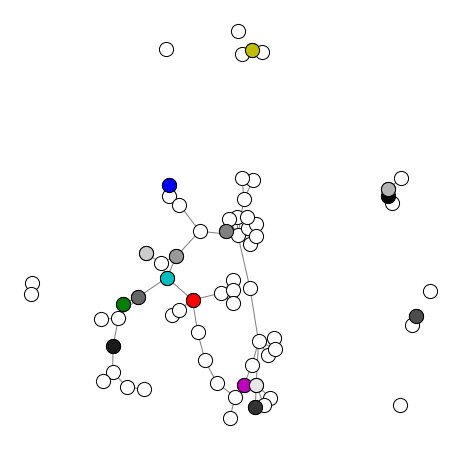

In [13]:
viz.plot_community_graph(g, communities)

In [14]:
coms = algorithms.bimlpa(g)

In [15]:
coms.erdos_renyi_modularity()

FitnessResult(min=None, max=None, score=-0.019615765286500077, std=None)

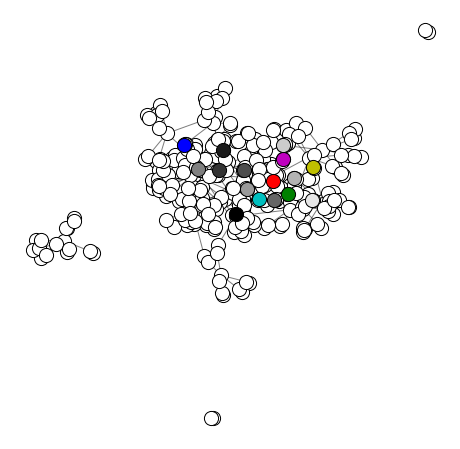

In [16]:
viz.plot_community_graph(g, coms)

## Projection of the graph on reviews

usual approach for the analysis of bipartite graphs consists of deriving unipartite graphs (projections) from the underlying bipartite structure, which however is associated with important loss of information and data storage issues

In [17]:
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

In [18]:
G= bipartite.generic_weighted_projected_graph(g, list(top_nodes), weight_function=my_weight)

In [19]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1260952
Average degree: 226.9941


## Community discovery on the projected graph

#### Louvain algorithm

This algorithm works on the principle of partitioning a network into mutually exclusive communities such that the number of edges across different communities is significantly less than expectation, whereas the number of edges within each community is significantly greater than expectation. The Louvain algortihm is one of the most widely used for identifying communities due its speed and high modularity. Modularity values can span from -1 to 1, and the higher the value, the better the community structure that is formed.
(https://medium.com/@adityagandhi.7/network-analysis-and-community-structure-for-market-surveillance-using-python-networkx-65413e7b7fee)

In [20]:
louv_coms = algorithms.louvain(G, weight='weight', resolution=1., randomize=False)

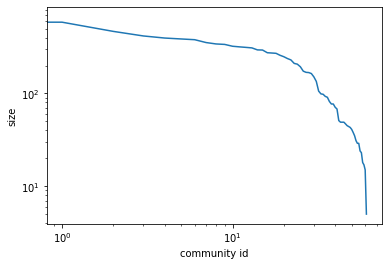

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
ls= louv_coms.communities
sz=[]
for i in range (len(ls)):
    sizes = len(ls[i])
    sz.append(sizes)
sz.sort(reverse=True)
plt.xscale("log")
plt.xlabel("community id")
plt.yscale("log")
plt.ylabel("size")
plt.plot(sz)
plt.show()

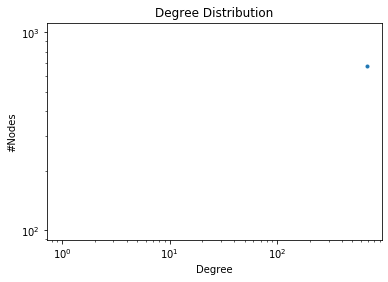

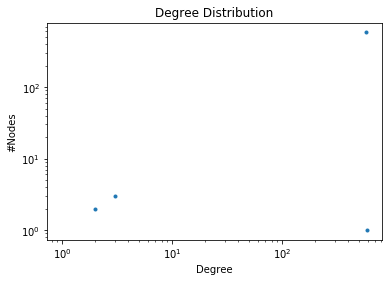

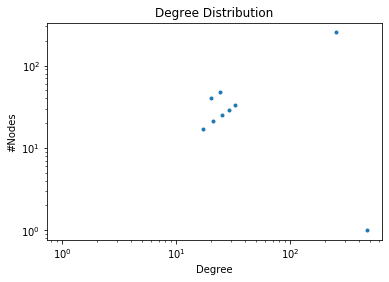

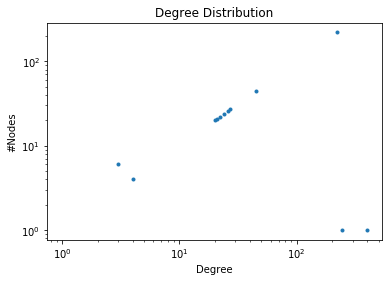

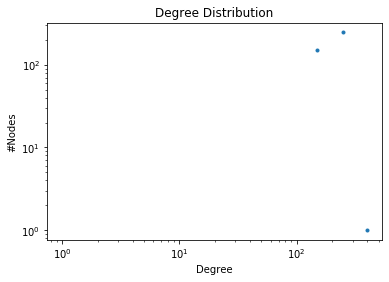

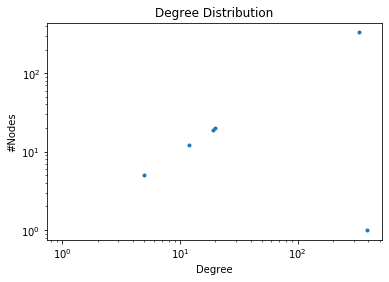

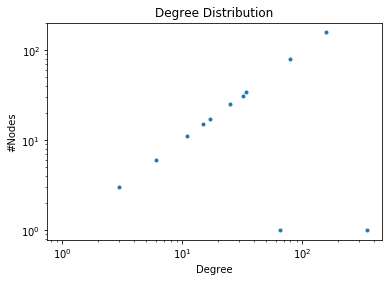

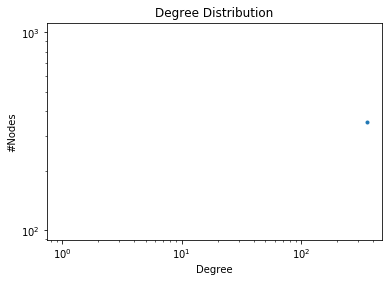

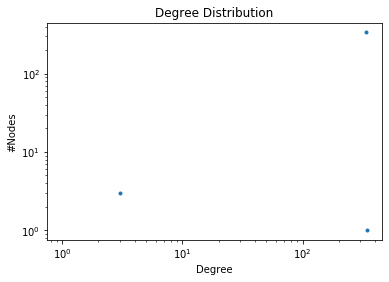

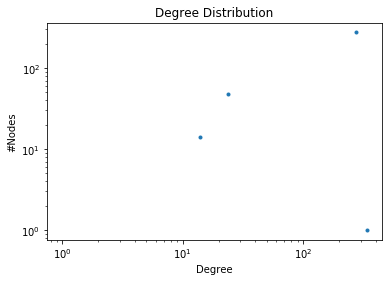

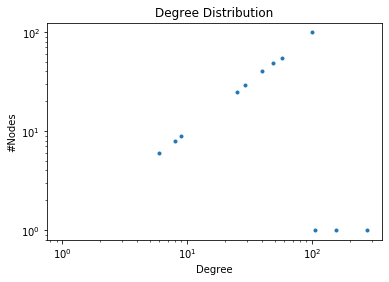

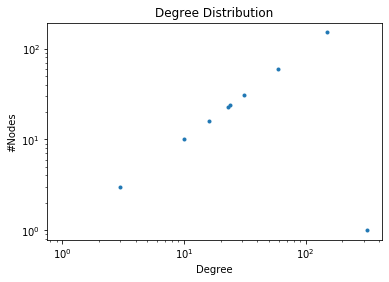

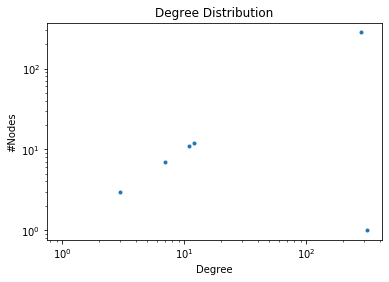

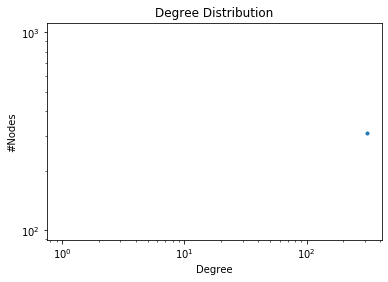

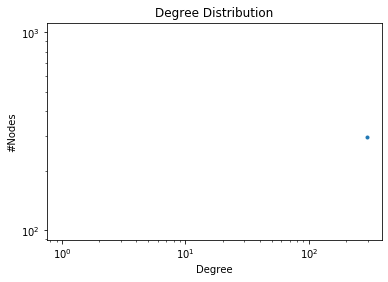

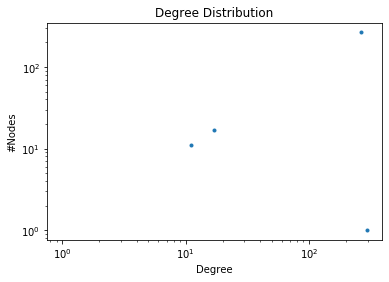

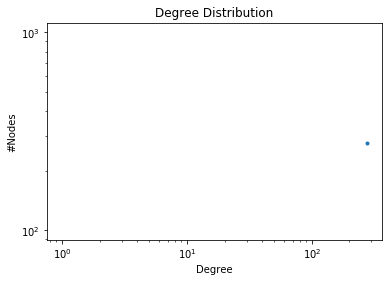

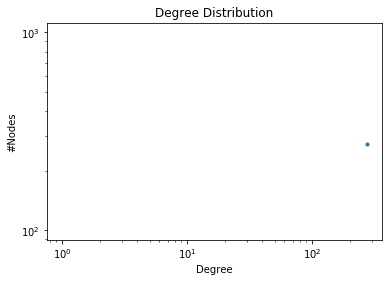

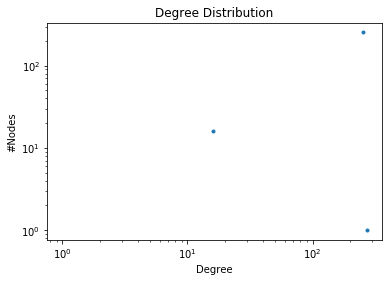

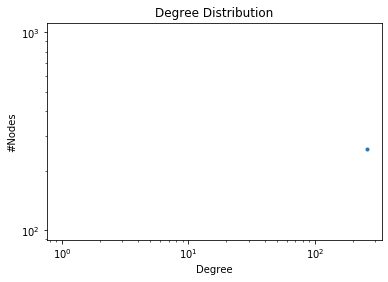

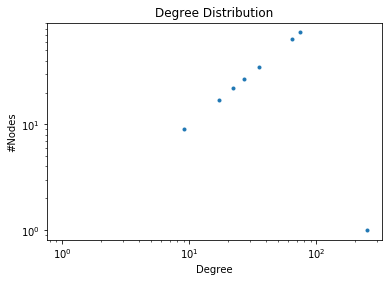

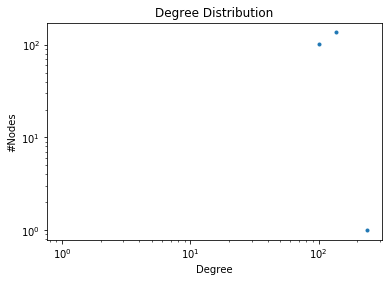

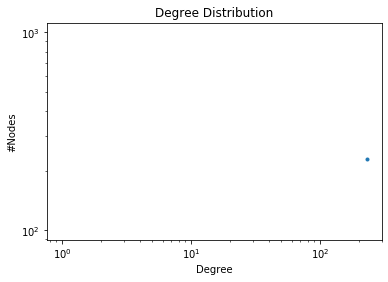

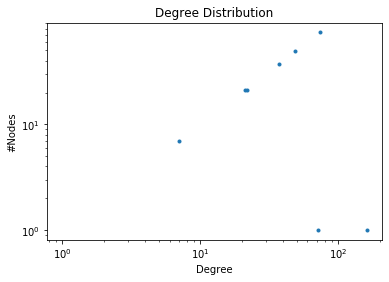

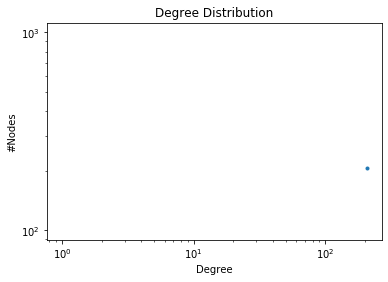

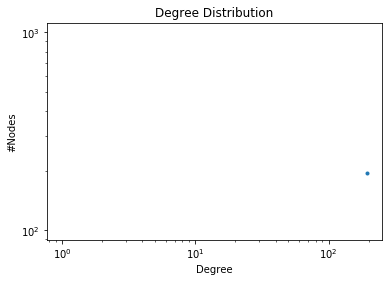

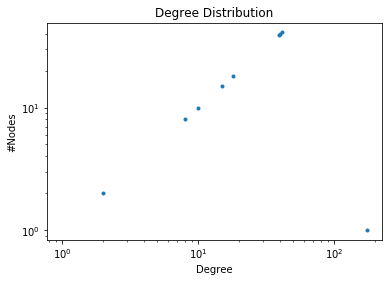

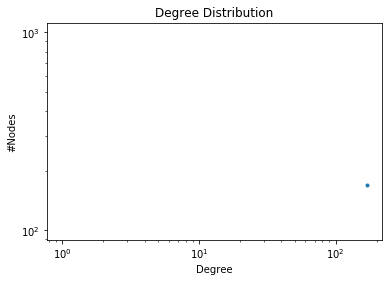

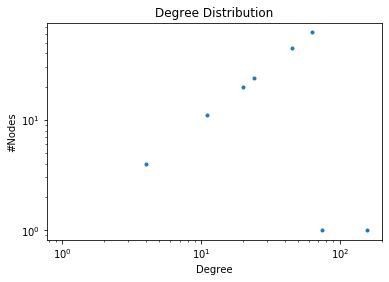

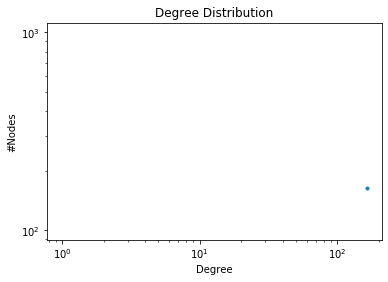

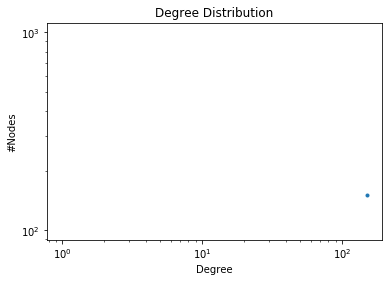

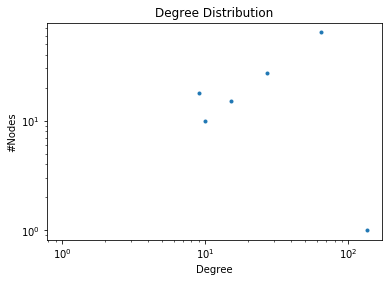

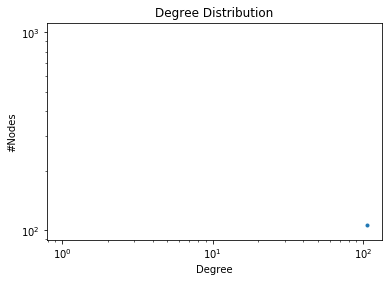

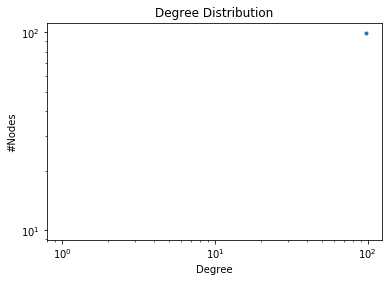

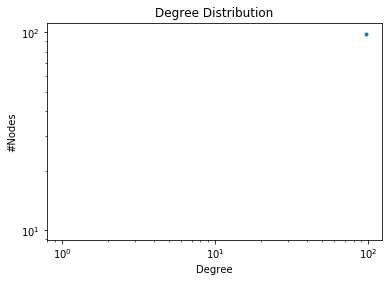

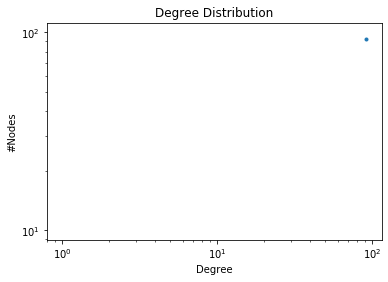

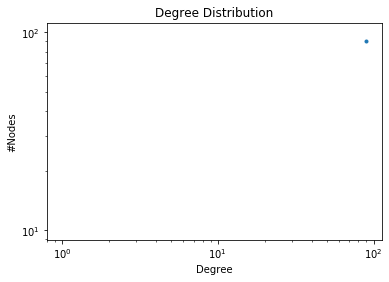

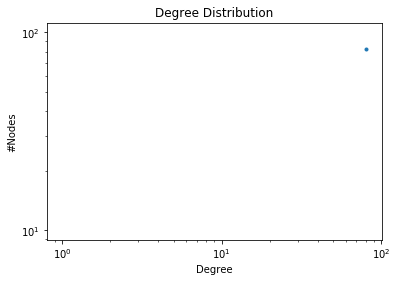

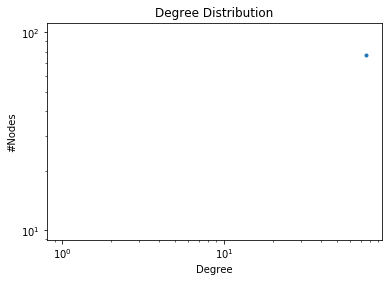

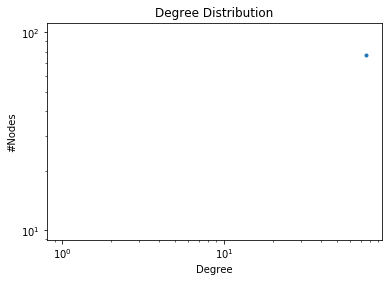

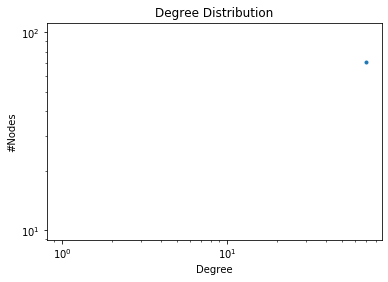

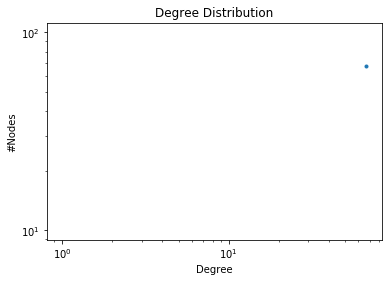

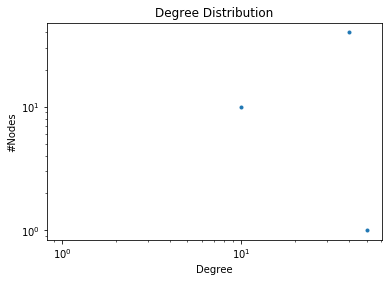

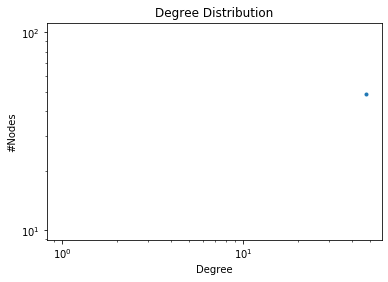

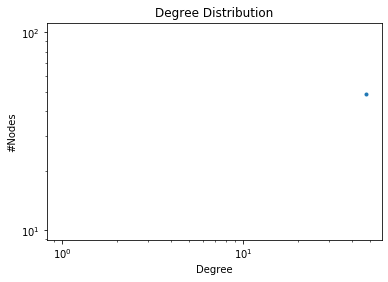

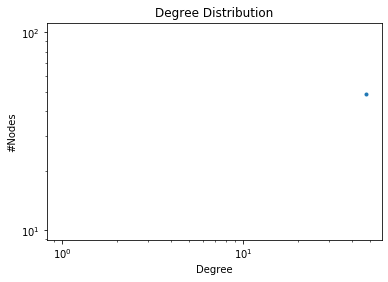

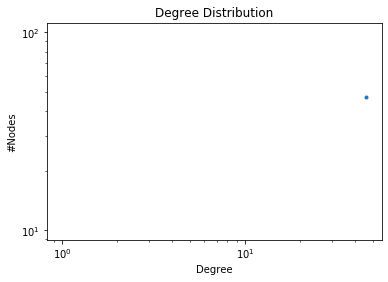

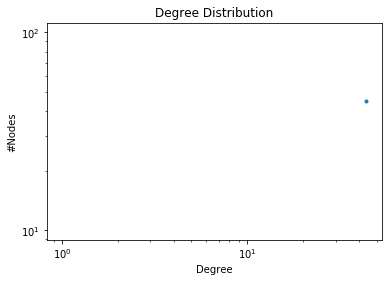

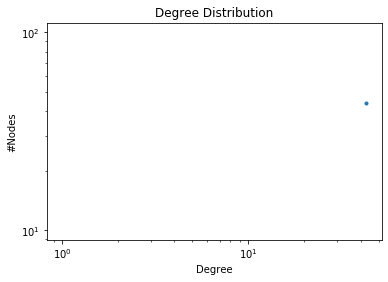

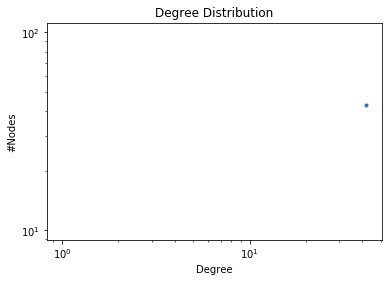

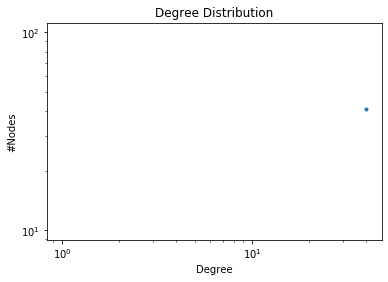

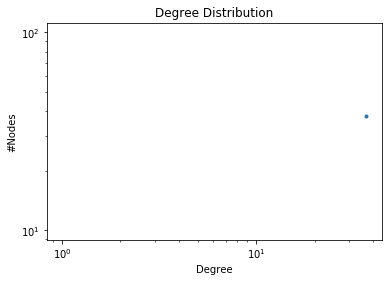

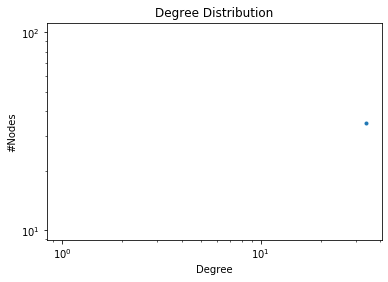

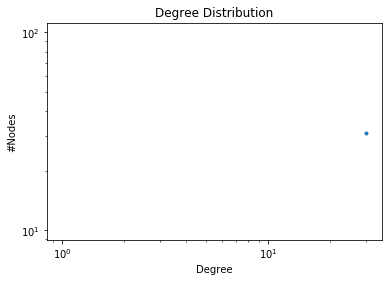

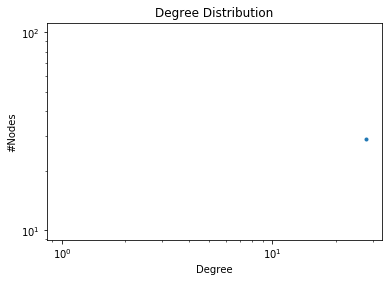

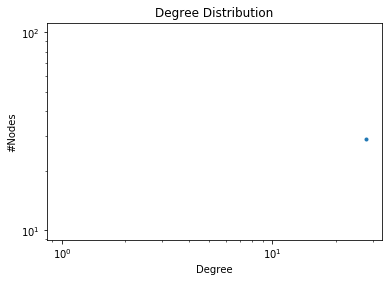

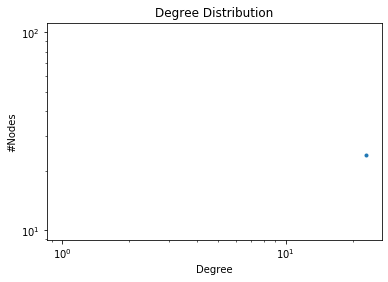

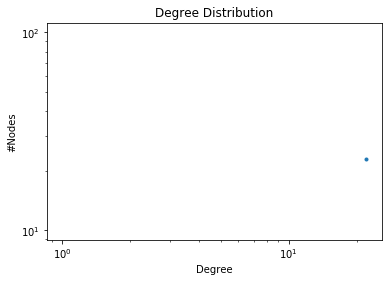

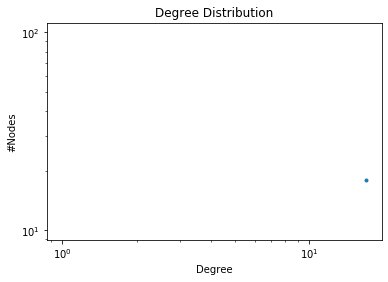

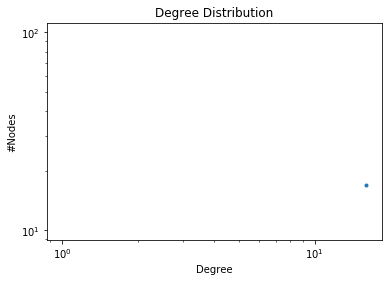

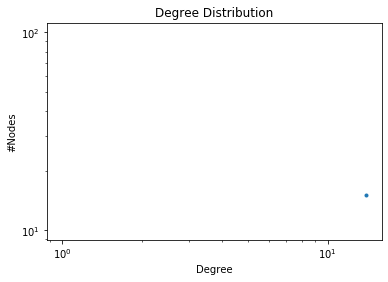

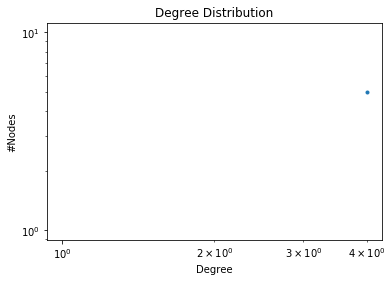

In [22]:
lista= louv_coms.communities  #una funzione crescente indica un assortative mixing, se ottengo una funz decerscente i nodi sono tutti diversi
for i in range (0, len(lista)):
    c=G.subgraph(lista[i])
    hist = nx.degree_histogram(c)
    plt.plot(range(0, len(hist)), hist, ".")
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("#Nodes")
    plt.loglog()
    plt.show()

In [23]:
mem=louv_coms.communities
deg=networkx.algorithms.centrality.degree_centrality(G)
l=[]
for lista in mem:
    diz = {}
    for e in lista:
        try:
            val = deg[e]
            diz[e]= val
        except:
            pass
    l.append(diz)

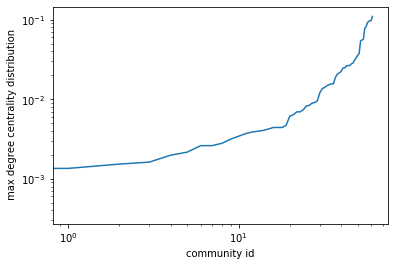

In [24]:
md=[]
for i in range (len(l)):
    m=max(l[i].values())
    md.append(m)
%matplotlib inline
md.sort(reverse=False)
plt.xscale("log")
plt.xlabel("community id")
plt.yscale("log")
plt.ylabel(" max degree centrality distribution")
plt.plot(md)
plt.show()

In [25]:
l=louv_coms.communities
b=[]
for i in range (len(l)):
    c=G.subgraph(l[i])
    degrees = dict(c.degree())
    ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
    b.append(ranks)

In [26]:
#nodi con maggiore degree centrality
for i in range(len(b)):
    c=len(b[i])
    for j in range(c):
        for k in range(1,c):
            if b[i][j][1]>=b[i][k][1]:
                a= b[i][j]
    print(a)
    

('23220831', 676)
('47646083', 2)
('17607319', 17)
('83224297', 3)
('20556822', 149)
('20481801', 5)
('38961543', 3)
('4988755', 353)
('3253906', 3)
('315028872', 14)
('30606389', 6)
('151274665', 3)
('22687870', 3)
('72455705', 309)
('204745801', 294)
('27623874', 11)
('70018174', 274)
('5871036', 272)
('152112902', 16)
('133328790', 257)
('59115150', 9)
('149126710', 101)
('121821747', 229)
('20862436', 7)
('96222180', 206)
('280033971', 193)
('113773770', 2)
('15735197', 168)
('37652349', 4)
('4263890', 163)
('61105704', 150)
('21956956', 9)
('63204546', 105)
('92730436', 98)
('56789226', 97)
('237996959', 92)
('159421725', 90)
('137483618', 81)
('123127844', 76)
('62083530', 76)
('85152460', 70)
('22712685', 67)
('14203458', 10)
('38819947', 48)
('31129293', 48)
('99533272', 48)
('62922887', 46)
('71988206', 44)
('16301372', 43)
('104532135', 42)
('39573991', 40)
('31086046', 37)
('35208757', 34)
('3438955', 30)
('45225187', 28)
('33838159', 28)
('47492178', 23)
('20574140', 22)
('

In [27]:
mod = evaluation.newman_girvan_modularity(G,louv_coms)
print(mod) #Modularity is a metric that quantifies the quality of an assignment of nodes to communities by evaluating 
           #how much more densely connected the nodes within a community are compared to how connected they would be, on average, 
           #in a suitably defined random network.

FitnessResult(min=None, max=None, score=0.9239248285455048, std=None)


In [28]:
louv_mod= evaluation.erdos_renyi_modularity(G,louv_coms)
print(louv_mod)

FitnessResult(min=None, max=None, score=0.9668524415471225, std=None)


In [29]:
louv_sz = evaluation.size(G,louv_coms) #Size is the number of nodes in the community
print(louv_sz)

FitnessResult(min=5, max=677, score=179.19354838709677, std=151.8408375845467)


In [30]:
louv_int_den = evaluation.internal_edge_density(G,louv_coms)
print(louv_int_den)

FitnessResult(min=0.04619445032017384, max=0.25, score=0.2103541786866176, std=0.06985908067853136)


In [31]:
louv_mod_den = evaluation.modularity_density(G,louv_coms)
print(louv_mod_den)

FitnessResult(min=None, max=None, score=8200.930744951409, std=None)


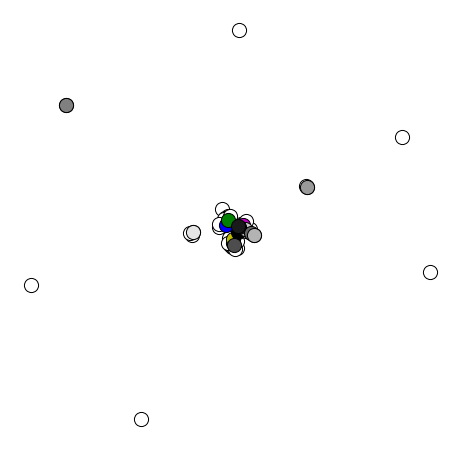

In [32]:
viz.plot_community_graph(G, louv_coms)

#### Label Propagation algorithm

Label propagation assumes that all vertices have different community labels as the initial state, and each vertex repeatedly changes its own community according to the surrounding vertices to determine the community. 

In [33]:
la_coms = algorithms.label_propagation(G) #LPA reaches convergence when each node has the majority label of its neighbours.

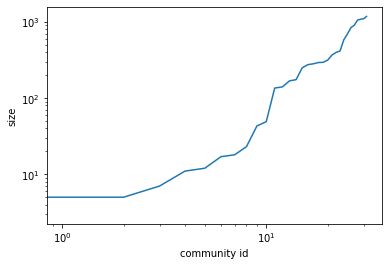

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
las= la_coms.communities
sz=[]
for i in range (len(las)):
    sizes = len(las[i])
    sz.append(sizes)
sz.sort(reverse=False)
plt.xscale("log")
plt.xlabel("community id")
plt.yscale("log")
plt.ylabel("size")
plt.plot(sz)
plt.show()

In [35]:
mem=la_coms.communities
deg=networkx.algorithms.centrality.degree_centrality(G)
l=[]
for lista in mem:
    diz = {}
    for e in lista:
        try:
            val = deg[e]
            diz[e]= val
        except:
            pass
    l.append(diz)

In [36]:
for i in range (len(l)):
    print("maximum degree centrality in comm {} : ".format(i+1), max(l[i].values()))

maximum degree centrality in comm 1 :  0.09685840309658834
maximum degree centrality in comm 2 :  0.10946079755153479
maximum degree centrality in comm 3 :  0.0971284544063372
maximum degree centrality in comm 4 :  0.09469799261859753
maximum degree centrality in comm 5 :  0.08101539292465568
maximum degree centrality in comm 6 :  0.05410027905302007
maximum degree centrality in comm 7 :  0.0775047258979206
maximum degree centrality in comm 8 :  0.09127734269511206
maximum degree centrality in comm 9 :  0.037267080745341616
maximum degree centrality in comm 10 :  0.0356467728868485
maximum degree centrality in comm 11 :  0.033036276892609594
maximum degree centrality in comm 12 :  0.031145917724367627
maximum degree centrality in comm 13 :  0.026375011252137905
maximum degree centrality in comm 14 :  0.026284994148888286
maximum degree centrality in comm 15 :  0.05644072373751012
maximum degree centrality in comm 16 :  0.024664686290395175
maximum degree centrality in comm 17 :  0.0223

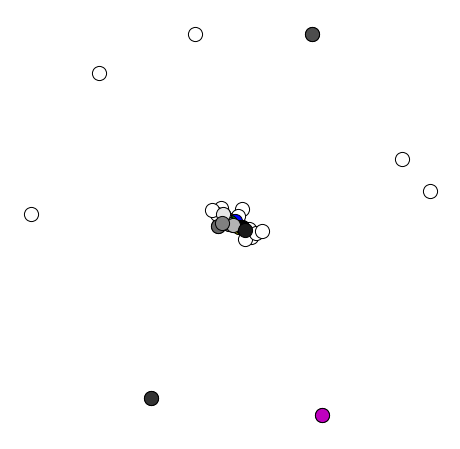

In [37]:
viz.plot_community_graph(G, la_coms)

In [38]:
la_mod= evaluation.erdos_renyi_modularity(G,la_coms)
print(la_mod)

FitnessResult(min=None, max=None, score=0.9315911994122041, std=None)


In [39]:
la_sz = evaluation.size(G,la_coms)
la_sz

FitnessResult(min=3, max=1175, score=347.1875, std=370.15794242964716)

In [40]:
la_int_den = evaluation.internal_edge_density(G,la_coms)
print(la_int_den)

FitnessResult(min=0.030244892177448923, max=0.25, score=0.14535406590974864, std=0.08734046360481537)


#### K_cliques communities

In [41]:
cliques= nx.find_cliques(G)#una cricca è un insieme V di vertici in un grafo non orientato G, 
                                  #tale che, per ogni coppia di vertici in V, esiste un arco che li collega

In [42]:
lc=list(cliques)
a=0
for i in range (len(lc)):
    a+= len(lc[i])
print(a/len(lc))

73.6078431372549


In [43]:
k_cl_comm = algorithms.kclique(G, k=73)
#Find k-clique communities in graph using the percolation method. 
#A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques

In [44]:
k_cl_mod= evaluation.erdos_renyi_modularity(G,k_cl_comm)
print(k_cl_mod)

FitnessResult(min=None, max=None, score=0.9405091207233703, std=None)


In [45]:
k_cl_sz = evaluation.size(G,k_cl_comm)
k_cl_sz

FitnessResult(min=75, max=677, score=209.9, std=129.17290737612126)

In [46]:
k_cl_int_den = evaluation.internal_edge_density(G,k_cl_comm)
print(k_cl_int_den)

FitnessResult(min=0.25, max=0.25, score=0.25, std=0.0)


#### Evaluation between algorithms

In [47]:
evaluation.variation_of_information(la_coms,louv_coms) #the variation of information is zero when the two circles completely overlap.

MatchingResult(score=1.4432433597251464, std=None)

In [48]:
evaluation.overlapping_normalized_mutual_information_LFK(louv_coms,la_coms)

MatchingResult(score=0.5177614044670236, std=None)

In [49]:
evaluation.overlapping_normalized_mutual_information_LFK(k_cl_comm,la_coms)

MatchingResult(score=0.2798922756275306, std=None)

In [50]:
evaluation.overlapping_normalized_mutual_information_LFK(k_cl_comm,louv_coms)

MatchingResult(score=0.6509104951523674, std=None)

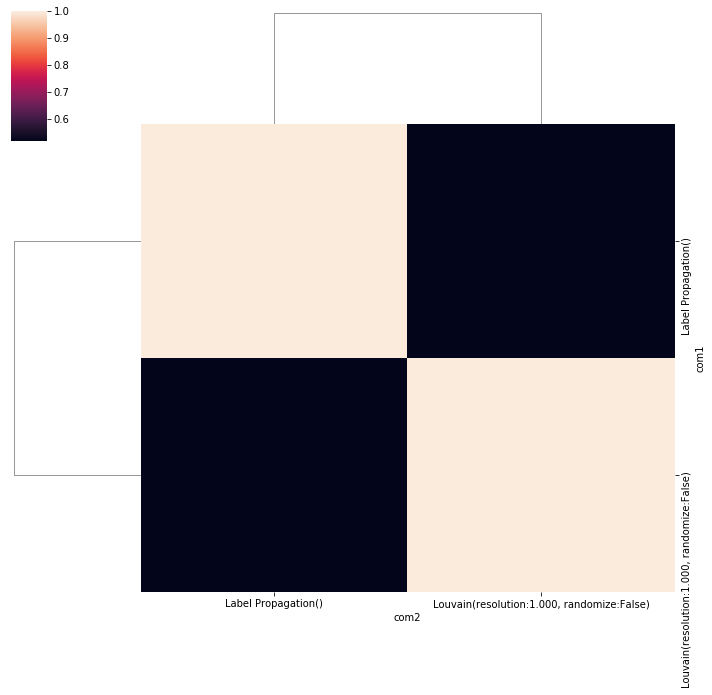

In [51]:
clustermap = viz.plot_sim_matrix([la_coms,louv_coms],evaluation.overlapping_normalized_mutual_information_LFK) 
#Plot a similarity matrix between a list of clusterings, using the provided scoring function.

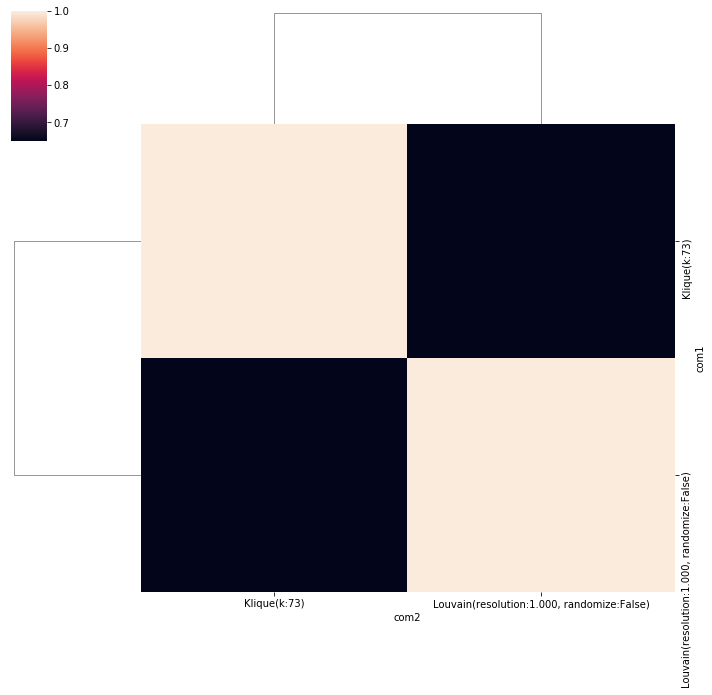

In [52]:
clustermap = viz.plot_sim_matrix([k_cl_comm,louv_coms],evaluation.overlapping_normalized_mutual_information_LFK) 
#Plot a similarity matrix between a list of clusterings, using the provided scoring function.

# Projection of graph on houses

In [53]:
G_H= bipartite.generic_weighted_projected_graph(g, list(bottom_nodes), weight_function=my_weight)

In [54]:
print(nx.info(G_H))

Name: 
Type: Graph
Number of nodes: 156
Number of edges: 701
Average degree:   8.9872


In [55]:
print(nx.number_connected_components(G_H))

9


In [56]:
PHgcc = sorted(nx.connected_components(G_H), key=len, reverse=True)
PHG0 = G_H.subgraph(PHgcc[0])


In [57]:
print(nx.info(PHG0))

Name: 
Type: Graph
Number of nodes: 117
Number of edges: 596
Average degree:  10.1880


#### Louvain

In [58]:
louv_coms = algorithms.louvain(G_H, weight='weight', resolution=1., randomize=False)

In [59]:
evaluation.size(G_H, louv_coms)

FitnessResult(min=1, max=20, score=7.8, std=4.308131845707603)

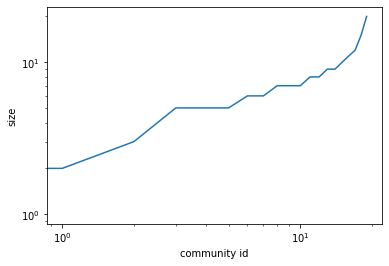

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
lous= louv_coms.communities
sz=[]
for i in range (len(lous)):
    sizes = len(lous[i])
    sz.append(sizes)
sz.sort(reverse=False)
plt.xscale("log")
plt.xlabel("community id")
plt.yscale("log")
plt.ylabel("size")
plt.plot(sz)
plt.show()

In [61]:
lista= louv_coms.communities  #una funzione crescente indica un assortative mixing, se ottengo una funz decerscente i nodi sono tutti diversi
for i in range (0, len(lista)):
    c=G_H.subgraph(lista[i])
    try:
        print("Assortativity cluster {} : {} ".format(i, degree_assortativity_coefficient(c, x='out', y='in', weight=None, nodes=None) ))
    except:
        pass
#dal cluster 2 in poi, tutti i nodi hanno degree uguale all'interno del cluster (es: tutti degree==17)

Assortativity cluster 0 : nan 
Assortativity cluster 1 : nan 
Assortativity cluster 2 : nan 
Assortativity cluster 3 : 0.5019157088122593 
Assortativity cluster 4 : nan 
Assortativity cluster 5 : nan 
Assortativity cluster 6 : nan 
Assortativity cluster 7 : 0.4434523809523793 
Assortativity cluster 8 : nan 
Assortativity cluster 9 : nan 
Assortativity cluster 10 : nan 
Assortativity cluster 11 : nan 
Assortativity cluster 12 : nan 
Assortativity cluster 13 : nan 
Assortativity cluster 14 : nan 
Assortativity cluster 15 : nan 
Assortativity cluster 16 : nan 
Assortativity cluster 17 : nan 
Assortativity cluster 18 : nan 


C:\Users\monia\anaconda3\lib\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [62]:
louv_coms.average_internal_degree(summary=False)

[19.0,
 14.0,
 11.0,
 4.7272727272727275,
 9.0,
 8.0,
 8.0,
 4.25,
 7.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 4.0,
 4.0,
 4.0,
 2.0,
 1.0,
 0.0]

In [63]:
mem=louv_coms.communities
deg=networkx.algorithms.centrality.degree_centrality(G_H)
l=[]
for lista in mem:
    diz = {}
    for e in lista:
        try:
            val = deg[e]
            diz[e]= val
        except:
            pass
    l.append(diz)

In [64]:
for i in range (len(l)):
    try:
        print("maximum degree in comm {} : ".format(i+1), max(l[i].values()))
    except:
        pass

maximum degree in comm 1 :  0.17419354838709677
maximum degree in comm 2 :  0.14193548387096774
maximum degree in comm 3 :  0.07741935483870968
maximum degree in comm 4 :  0.03870967741935484
maximum degree in comm 5 :  0.05806451612903226
maximum degree in comm 6 :  0.05806451612903226
maximum degree in comm 7 :  0.05806451612903226
maximum degree in comm 8 :  0.05161290322580645
maximum degree in comm 9 :  0.05806451612903226
maximum degree in comm 10 :  0.04516129032258064
maximum degree in comm 11 :  0.04516129032258064
maximum degree in comm 12 :  0.03870967741935484
maximum degree in comm 13 :  0.03870967741935484
maximum degree in comm 14 :  0.03225806451612903
maximum degree in comm 15 :  0.03870967741935484
maximum degree in comm 16 :  0.025806451612903226
maximum degree in comm 17 :  0.025806451612903226
maximum degree in comm 18 :  0.012903225806451613
maximum degree in comm 19 :  0.0064516129032258064
maximum degree in comm 20 :  0.0


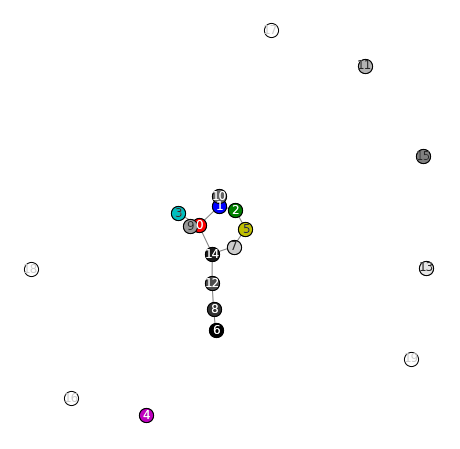

In [65]:
viz.plot_community_graph(G_H, louv_coms,plot_labels=True)

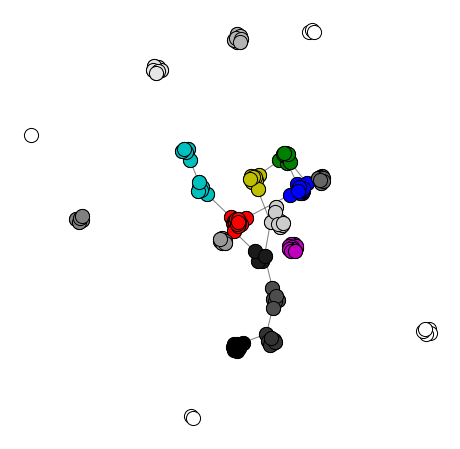

In [66]:
pos = nx.spring_layout(G_H)
viz.plot_network_clusters(G_H, louv_coms, pos)

#### Label propagation

In [67]:
la_coms = algorithms.label_propagation(G_H) #LPA reaches convergence when each node has the majority label of its neighbours.

In [69]:
lista= la_coms.communities  #una funzione crescente indica un assortative mixing, se ottengo una funz decerscente i nodi sono tutti diversi
for i in range (0, len(lista)):
    c=G_H.subgraph(lista[i])
    try:
        print("Assortativity cluster {} : {} ".format(i, degree_assortativity_coefficient(c, x='out', y='in', weight=None, nodes=None) ))
    except:
        pass
#dal cluster 2 in poi, tutti i nodi hanno degree uguale all'interno del cluster (es: tutti degree==17)

Assortativity cluster 0 : 0.5651373331287405 
Assortativity cluster 1 : 0.37362637362637224 
Assortativity cluster 2 : nan 
Assortativity cluster 3 : 0.5019157088122593 
Assortativity cluster 4 : 0.5019157088122593 
Assortativity cluster 5 : nan 
Assortativity cluster 6 : nan 
Assortativity cluster 7 : nan 
Assortativity cluster 8 : nan 
Assortativity cluster 9 : nan 
Assortativity cluster 10 : nan 
Assortativity cluster 11 : nan 
Assortativity cluster 12 : nan 
Assortativity cluster 13 : nan 
Assortativity cluster 14 : nan 
Assortativity cluster 15 : nan 
Assortativity cluster 16 : nan 


In [70]:
mem=la_coms.communities
deg=networkx.algorithms.centrality.degree_centrality(G_H)
l1=[]
for lista in mem:
    diz = {}
    for e in lista:
        try:
            val = deg[e]
            diz[e]= val
        except:
            pass
    l1.append(diz)

In [71]:
for i in range (len(l1)-1):
    print("maximum degree in comm {} : ".format(i+1), max(l[i].values()))

maximum degree in comm 1 :  0.17419354838709677
maximum degree in comm 2 :  0.14193548387096774
maximum degree in comm 3 :  0.07741935483870968
maximum degree in comm 4 :  0.03870967741935484
maximum degree in comm 5 :  0.05806451612903226
maximum degree in comm 6 :  0.05806451612903226
maximum degree in comm 7 :  0.05806451612903226
maximum degree in comm 8 :  0.05161290322580645
maximum degree in comm 9 :  0.05806451612903226
maximum degree in comm 10 :  0.04516129032258064
maximum degree in comm 11 :  0.04516129032258064
maximum degree in comm 12 :  0.03870967741935484
maximum degree in comm 13 :  0.03870967741935484
maximum degree in comm 14 :  0.03225806451612903
maximum degree in comm 15 :  0.03870967741935484
maximum degree in comm 16 :  0.025806451612903226
maximum degree in comm 17 :  0.025806451612903226


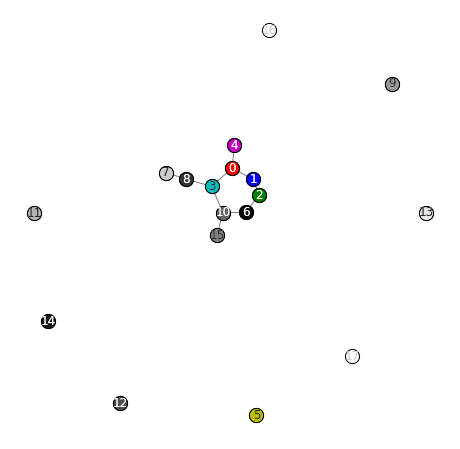

In [72]:
viz.plot_community_graph(G_H, la_coms,plot_labels=True)

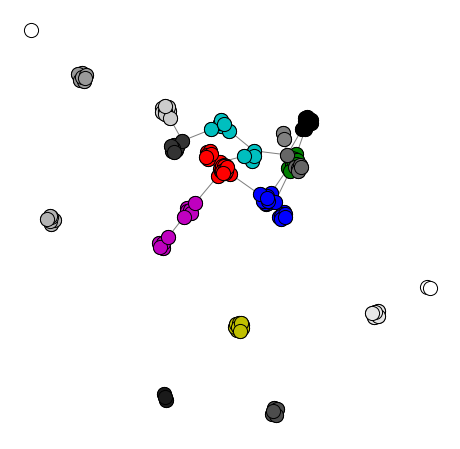

In [73]:
pos = nx.spring_layout(G_H)
viz.plot_network_clusters(G_H, la_coms, pos)

In [74]:
la_mod= evaluation.erdos_renyi_modularity(G_H,la_coms)
print(la_mod)

FitnessResult(min=None, max=None, score=0.9033321180070066, std=None)


In [75]:
la_sz = evaluation.size(G_H,la_coms)
print(la_sz)

FitnessResult(min=1, max=27, score=8.666666666666666, std=6.5064070986477125)


#### Angel

In [76]:
an_coms = algorithms.angel(G_H, min_community_size=1, threshold=0.30)

In [77]:
an_mod= evaluation.erdos_renyi_modularity(G_H,an_coms)
print(an_mod)

FitnessResult(min=None, max=None, score=0.9178294271801245, std=None)


In [78]:
an_sz = evaluation.size(G_H,an_coms)
an_sz

FitnessResult(min=5, max=20, score=8.333333333333334, std=3.844187531556932)

## Comparison

In [79]:
evaluation.variation_of_information(louv_coms,la_coms) #the variation of information is zero when the two circles completely overlap.

MatchingResult(score=0.381853370190207, std=None)

In [80]:
evaluation.overlapping_normalized_mutual_information_LFK(louv_coms,la_coms)

MatchingResult(score=0.8657239101503658, std=None)

In [81]:
evaluation.overlapping_normalized_mutual_information_LFK(louv_coms,an_coms)

MatchingResult(score=0.864256666611404, std=None)

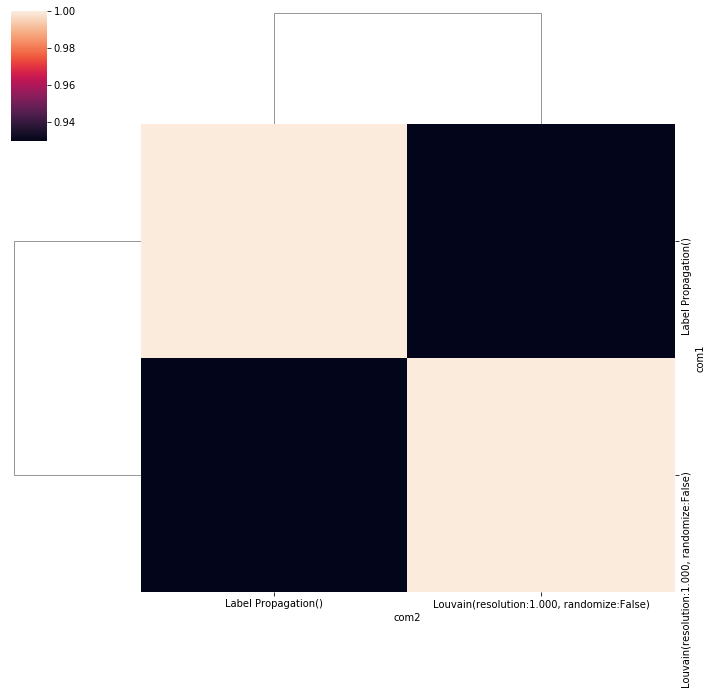

In [82]:
clustermap = viz.plot_sim_matrix([la_coms,louv_coms], evaluation.adjusted_mutual_information) 
#Plot a similarity matrix between a list of clusterings, using the provided scoring function.